In [1]:
import numpy as np
from plot_utils import criar_plot
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal
from scipy.signal import TransferFunction, step, lsim


# Oficina de Modelagem e Simulação - Lista 3
#### Pedro Henrique de Menezes Cosme - 2021075677

### Questão 1)

#### 1. Com Respeito ao Modelo do Motor CC do Exercício #2, Pede-se:

##### **a) Obtenha Analiticamente a Função de Transferência (FT) da Tensão de Armadura para a Velocidade Angular, Chame $G_1(s)$**

1. **Equações Pertinentes do Modelo do Motor CC:**

   $v_i(t) = R_a \cdot i_a(t) + L_a \cdot \frac{di_a(t)}{dt} + v_{cem}(t)$
   
   $v_{cem}(t) = K \cdot \omega(t)$
   
   $J \cdot \frac{d\omega(t)}{dt} = T_g(t) - T_f(t) - T_L(t)$
   
   $T_g(t) = K \cdot i_a(t)$
   

    - **Desprezar $ T_f(t) $:**
     
     $J \cdot \frac{d\omega(t)}{dt} = K \cdot i_a(t) - T_L(t)$
     
     Para a função de transferência entre $v_i(t)$ e $ \omega(t) $, consideramos que $ T_L(t) = 0 $ (sem carga).

   - **Condições Iniciais Nulas:**
     
     Consideramos que as condições iniciais para $i_a(t)$ e $\omega(t)$ são zero:
     
     $i_a(0) = 0, \quad \omega(0) = 0$
  

2. **Aplicação da Transformada de Laplace:**

    1. **Transformada da Equação da Armadura:**

        $V_i(s) = R_a I_a(s) + L_a s I_a(s) + K \Omega(s)$
        
    2. **Transformada da Equação Mecânica:**

        $J s \Omega(s) = K I_a(s)$

3. **Eliminação da Corrente de Armadura \( I_a(s) \)**

    Para obter a função de transferência de formato $ G_1(s) = \dfrac{\Omega(s)}{V_i(s)} $ elimina-se $ I_a(s) $ das equações.

1. **Isolando $ I_a(s) $ na Equação Mecânica:**

   $ I_a(s) = \frac{J s \Omega(s)}{K} $

2. **Substituindo $ I_a(s) $ na Equação da Armadura:**

   $ V_i(s) = R_a \left( \frac{J s \Omega(s)}{K} \right) + L_a s \left( \frac{J s \Omega(s)}{K} \right) + K \Omega(s)$

3. **Simplificação da Equação**

    Multiplicando ambos os lados por $ K $ para eliminar os denominadores:

    $ K V_i(s) = R_a J s \Omega(s) + L_a J s^2 \Omega(s) + K^2 \Omega(s)$

4. **Agrupando os Termos**

    Colocando $ \Omega(s) $ em evidência:

    $ K V_i(s) = \left( L_a J s^2 + R_a J s + K^2 \right) \Omega(s) $

5. **A Função de Transferência**

    Isolando $ \Omega(s) $:

    $ \Omega(s) = \frac{K V_i(s)}{L_a J s^2 + R_a J s + K^2} $

    Portanto, a função de transferência $ G_1(s) $ é:

    $ G_1(s) = \frac{\Omega(s)}{V_i(s)} = \frac{K}{L_a J s^2 + R_a J s + K^2} $

   

##### b) **Otenção da Função de Transferência $ G_2(s) $ do Torque de Carga para a Velocidade Angular**

Considerando as equações fundamentais do motor CC com **condições iniciais nulas** e **desprezando o torque de atrito \( T_f(t) \)**:

1. **Equação da Armadura**:

   $0 = R_a i_a(t) + L_a \frac{di_a(t)}{dt} + v_{cem}(t) $
   
   Onde:
   - $ v_{cem}(t) = K \omega(t) $

2. **Equação Mecânica**:

   
   $J \frac{d\omega(t)}{dt} = T_g(t) - T_L(t)$
   
   Onde:
   - $T_g(t) = K i_a(t)$

Utilizando as transformadas de LaPlace previamente computadas para a Equação da Armadura e da Equação Mecânica e considerando condições iniciais nulas $ i_a(0) = 0 $ e $ \omega(0) = 0 $.

1. **Transformada da Equação da Armadura**:

   $ 0 = R_a I_a(s) + L_a s I_a(s) + K \Omega(s) $

2. **Transformada da Equação Mecânica**:

   $J s \Omega(s) = K I_a(s) - T_L(s)$ 

#### **Eliminação da Corrente de Armadura $ I_a(s) $**

Para obter a função de transferência $ G_2(s) = \dfrac{\Omega(s)}{T_L(s)} $ será eliminado $ I_a(s) $ das equações.

1. **Isolando $ I_a(s) $ na Equação da Armadura**:


   $R_a I_a(s) + L_a s I_a(s) = - K \Omega(s)$
   
   
   $ \left( R_a + L_a s \right) I_a(s) = - K \Omega(s) $
   
   
   $I_a(s) = - \frac{K \Omega(s)}{R_a + L_a s}$

2. **Substituindo $ I_a(s) $ na Equação Mecânica**:

   $J s \Omega(s) = K \left( - \frac{K \Omega(s)}{R_a + L_a s} \right) - T_L(s) $
   
    $   J s \Omega(s) = - \frac{K^2 \Omega(s)}{R_a + L_a s} - T_L(s) $
    
#### **Simplificação da Equação**

1. **Multiplicando ambos os lados por $ R_a + L_a s $ para eliminar denominadores**:


$   (R_a + L_a s) \left( J s \Omega(s) \right) = - K^2 \Omega(s) - (R_a + L_a s) T_L(s)$
2. **Distribuindo e agrupando termos**:

   $ J s (R_a + L_a s) \Omega(s) + K^2 \Omega(s) = - (R_a + L_a s) T_L(s)$

3. **Expansão do termo à esquerda**:


    $\left( J R_a s + J L_a s^2 + K^2 \right) \Omega(s) = - (R_a + L_a s) T_L(s)$

#### **Expressando a Função de Transferência**

1. **Colocando $ \Omega(s) $ em evidência**:

   $
   \left( J L_a s^2 + J R_a s + K^2 \right) \Omega(s) = - (R_a + L_a s) T_L(s)$

2. **Isolando $\Omega(s)$**:

   
   $\Omega(s) = - \frac{ (R_a + L_a s) }{ J L_a s^2 + J R_a s + K^2 } T_L(s)$

3. **Função de Transferência $ G_2(s) $**:

   $ G_2(s) = \frac{\Omega(s)}{T_L(s)} = - \frac{ R_a + L_a s }{ J L_a s^2 + J R_a s + K^2 } $
   
#### **c) Representando a FT com Python utilizando as mesmas entradas de degrau do exercício 2**

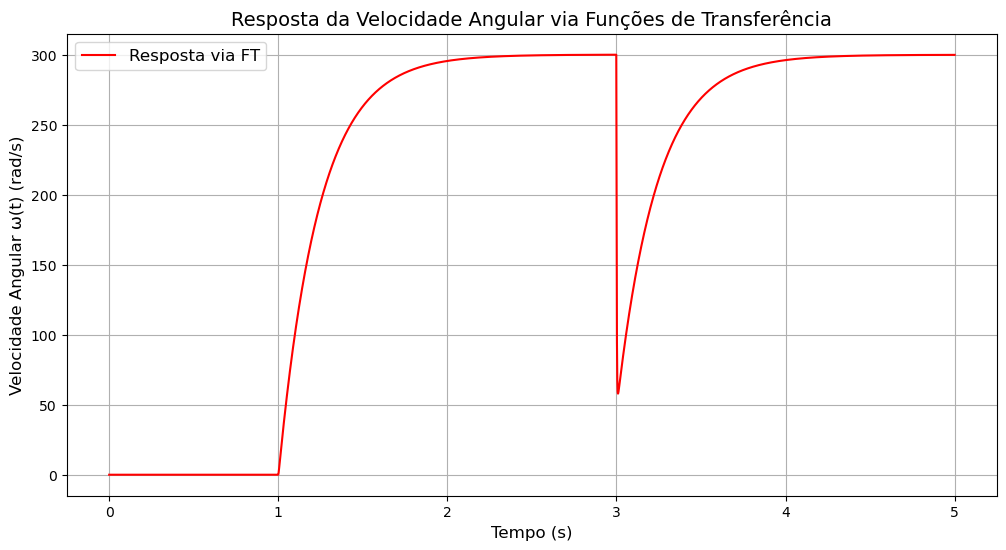

In [2]:
# Parâmetros do motor
Ra = 3            # Resistência da armadura (Ohm)
La = 6e-3         # Indutância da armadura (H)
K = 50e-3         # Constante do motor (Nm/A e V/(rad/s))
J = 2e-4          # Inércia (kg·m²)


from scipy.signal import TransferFunction, step, lsim

# Coeficientes do denominador (comuns a ambas as funções de transferência)
denominator = [1.2e-6, 6e-4, 2.5e-3]

# Função de Transferência G1(s)
numerator_G1 = [K]
G1 = TransferFunction(numerator_G1, denominator)

# Função de Transferência G2(s)
numerator_G2 = [-Ra, -La]
G2 = TransferFunction(numerator_G2, denominator)


# Intervalo de tempo para a simulação
t_start = 0
t_end = 5
t_step = 0.001
t = np.arange(t_start, t_end + t_step, t_step)

# Função de entrada de tensão
vi_values = np.zeros_like(t)
vi_values[t >= 1] = 15  # Degrau para 15 V em t >= 1 s

# Função de entrada de torque de carga
TL_values = np.zeros_like(t)
TL_values[t >= 3] = 0.05  # Degrau para 0.05 Nm em t >= 3 s

# Simulação da resposta de G1(s) à entrada vi(t)
t_out_G1, omega_G1, _ = lsim(G1, U=vi_values, T=t)

# Simulação da resposta de G2(s) à entrada TL(t)
t_out_G2, omega_G2, _ = lsim(G2, U=TL_values, T=t)

# Resposta total da velocidade angular
omega_total = omega_G1 + omega_G2

plt.figure(figsize=(12, 6))

plt.plot(t, omega_total, color='red', linewidth=1.5, label='Resposta via FT')
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade Angular ω(t) (rad/s)', fontsize=12)
plt.title('Resposta da Velocidade Angular via Funções de Transferência', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Ao comparar o gráfico obtido acima com o gráfico obtido pelo exercício 2, pode-se pontuar que:

* As respostas obtidas via funções de transferência e via modelagem completa são semelhantes em termos de tendência. Ambas apresentam o mesmo crescimento exponencial inicial e depois tendem a estabilidade em um valor parecido.

* Diferenças ao longo da resposta podem ser observadas, provavelmente causadas pelas simplificações feitas ao desprezar o torque de atrito $T_f(t)$ nas funções de transferência.

* Validade da Linearização: A proximidade das respostas indica que a utilização das funções de transferência é adequada para prever o comportamento do motor em resposta aos degraus aplicados.

#### **c) Lance mão do princípio de superposição e produza uma única figura que mostre a velocidade do motor sob a ação dos dois degraus**

A figura pode ser visualizada logo abaixo.

A figura gerada ilustra a resposta dinâmica do motor de corrente contínua (CC) quando submetido a dois degraus de entrada:

1. **Degrau na Tensão de Armadura $ v_i(t)$** em $ t = 1 $ segundo, com amplitude de $15 V$.
2. **Degrau no Torque de Carga $ T_L(t) $** em $ t = 3 $ segundos, com amplitude de $0,05 Nm$.

- **Curva Azul (Resposta a $ v_i(t) $**: Representa a resposta da velocidade angular $\omega(t)$ ao degrau de tensão. A curva mostra que a velocidade angular aumenta gradualmente após a aplicação da tensão em $ t = 1 $ s, até atingir um novo valor de estado de equilíbrio.

- **Curva Verde (Resposta a $ T_L(t) $**: É a resposta da velocidade angular ao degrau no torque de carga, considerando que a tensão de armadura permanece constante. A curva apresenta uma queda na velocidade angular após $ t = 3 $ s, o que mostra que o torque de carga atua no sentido oposto ao movimento, reduzindo a velocidade.

- **Curva Vermelha Tracejada (Resposta Total)**: É a soma das respostas individuais devido a $ v_i(t) $ e $ T_L(t) $, de acordo com o princípio da superposição. Esta curva representa a velocidade angular real do motor sob a ação simultânea das duas entradas.


<>:60: SyntaxWarning: invalid escape sequence '\o'
<>:60: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_39227/3460123473.py:60: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Velocidade Angular $\omega(t)$ (rad/s)', fontsize=12)


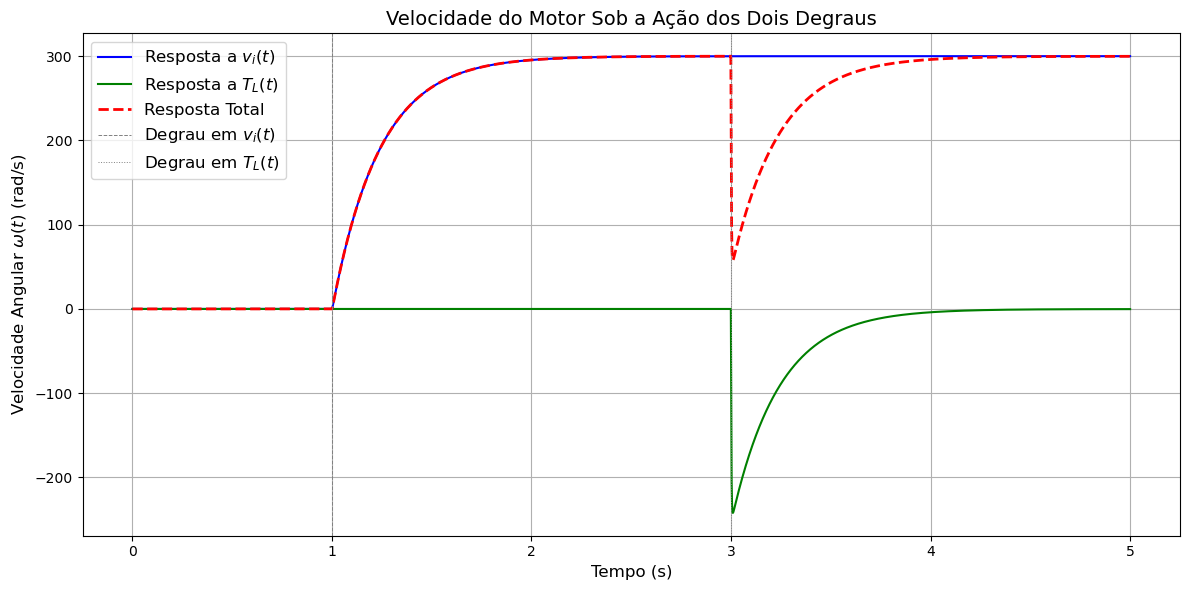

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, lsim

# Parâmetros do motor
Ra = 3            # Resistência da armadura (Ohm)
La = 6e-3         # Indutância da armadura (H)
K = 50e-3         # Constante do motor (Nm/A e V/(rad/s))
J = 2e-4          # Inércia (kg·m²)

# Intervalo de tempo para a simulação
t0 = 0
tf = 5
h = 0.001
t = np.arange(t0, tf + h, h)

# Funções de entrada
def vi(t):
    return 15 if t >= 1 else 0

def TL(t):
    return 0.05 if t >= 3 else 0

# Entradas para a simulação
vi_values = np.array([vi(ti) for ti in t])
TL_values = np.array([TL(ti) for ti in t])

# Funções de transferência
# Denominador comum
denominator = [La * J, Ra * J, K**2]

# Função de Transferência G1(s)
numerator_G1 = [K]
G1 = TransferFunction(numerator_G1, denominator)

# Função de Transferência G2(s)
numerator_G2 = [-Ra, -La]
G2 = TransferFunction(numerator_G2, denominator)

# Resposta à entrada vi(t) com TL(t) = 0
_, omega_G1, _ = lsim(G1, U=vi_values, T=t)

# Resposta à entrada TL(t) com vi(t) = 0
_, omega_G2, _ = lsim(G2, U=TL_values, T=t)

# Resposta total
omega_total = omega_G1 + omega_G2

# Plotando as respostas
plt.figure(figsize=(12, 6))

plt.plot(t, omega_G1, color='blue', linewidth=1.5, label='Resposta a $v_i(t)$')
plt.plot(t, omega_G2, color='green', linewidth=1.5, label='Resposta a $T_L(t)$')
plt.plot(t, omega_total, color='red', linestyle='--', linewidth=2, label='Resposta Total')

plt.axvline(x=1, color='grey', linestyle='--', linewidth=0.7, label='Degrau em $v_i(t)$')
plt.axvline(x=3, color='grey', linestyle=':', linewidth=0.7, label='Degrau em $T_L(t)$')

plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade Angular $\omega(t)$ (rad/s)', fontsize=12)
plt.title('Velocidade do Motor Sob a Ação dos Dois Degraus', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### **e) Determinação Analítica do Ganho CC e Comparação com o Valor Obtido por Simulação**


O **ganho CC** é o valor da função de transferência quando $ s = 0 $:

$G_{CC} = G_1(0) = \left. \frac{\Omega(s)}{V_i(s)} \right|_{s=0}$

Substituindo $s = 0 $ em $ G_1(s) $:

$G_{CC} = \frac{K}{L_a J (0)^2 + R_a J (0) + K^2} = \frac{K}{K^2} = \frac{1}{K}$

**Cálculo do Ganho CC:**

Temos que:
$ K = 50 \times 10^{-3} \, \text{Nm/A} = 0{,}05 \, \text{Nm/A} $

Então:


$G_{CC} = \frac{1}{0{,}05} = 20 \, \frac{\text{rad/s}}{\text{V}}$

Para uma entrada de tensão em degrau de amplitude $ V_i = 15 \, \text{V} $, a velocidade angular em regime permanente é:

$\omega_{\text{ss}} = G_{CC} \times V_i = 20 \times 15 = 300 \, \text{rad/s}$


De acordo com o gráfico, a velocidade angular se estabiliza em aproximadamente **300 rad/s** após o degrau de tensão em $ t = 1 \, \text{s} $.

Após $t = 3 \, \text{s} $, com a aplicação do torque de carga $T_L = 0{,}05 \, \text{Nm} $, a velocidade angular diminui e se estabiliza novamente no mesmo valor. 

Com isso, é possível afirmar que o cálculo analítico se apróxima da simulação de forma satisfatória.


#### **f) Obtenha os polos e zeros das funções de transferência numericamente.**

Utilizando os valores numéricos fornecidos com a função de transferência $G_1(t)$

 $R_a = 3 \, \Omega $
 $ L_a = 6 \times 10^{-3} \, \text{H} $
 $ K = 50 \times 10^{-3} \, \text{Nm/A} $
 $ J = 2 \times 10^{-4} \, \text{kg} \cdot \text{m}^2 $

Calcula-se os coeficientes do denominador:

$L_a J = (6 \times 10^{-3})(2 \times 10^{-4}) = 1{,}2 \times 10^{-6}$

$R_a J = (3)(2 \times 10^{-4}) = 6 \times 10^{-4}$

$K^2 = (50 \times 10^{-3})^2 = 2{,}5 \times 10^{-3}$

A função de transferência torna-se:


$G_1(s) = \frac{0{,}05}{1{,}2 \times 10^{-6} s^2 + 6 \times 10^{-4} s + 2{,}5 \times 10^{-3}}$

E para o denominador, temos:

$D(s) = 1{,}2 \times 10^{-6} s^2 + 6 \times 10^{-4} s + 2{,}5 \times 10^{-3}$

Para encontrar os polos, definimos $ D(s) = 0$:

$D(s) = 1{,}2 \times 10^{-6} s^2 + 6 \times 10^{-4} s + 2{,}5 \times 10^{-3} = 0$

Esta é uma equação quadrática da forma:

$a s^2 + b s + c = 0$

Onde:

- $a = 1{,}2 \times 10^{-6}$
- $b = 6 \times 10^{-4}$
- $c = 2{,}5 \times 10^{-3}$

Calculando as raízes do discriminante, obtemos:

$s_1 = \frac{ -0{,}000096 }{0{,}0000024} \approx -4,2 \, \text{rad/s}$

$s_2 = \frac{ -0{,}0011904 }{0{,}0000024} \approx -496 \, \text{rad/s}$

**Polos de $ G(s) $:**

- $s_1 = -4,2 \, \text{rad/s}$
- $s_2 = -496 \, \text{rad/s}$
- Zeros = $-0,002$


### **g) Com base nos polos, qual a constante de tempo?**

A equação para calcular a constante de tempo a partir de um polo \( s \) é:

$\tau = \frac{1}{|s|}$

Aplicando aos polos encontrados:

1. **Para o polo $ s_1 = -4{,}2 \, \text{rad/s} $:**

$\tau_1 = \frac{1}{|s_1|} = \frac{1}{4{,}2} \approx 0{,}238 \, \text{s}$

2. **Para o polo $ s_2 = -496 \, \text{rad/s} $:**

$\tau_2 = \frac{1}{|s_2|} = \frac{1}{496} \approx 0{,}00202 \, \text{s}$

$\tau_1$ é maior que $\tau_2$, o que significa que $\tau_1$ influencia mais a resposta do sistema, determinando a velocidade com que o sistema atinge o regime estacionário. Ela é a constante de tempo dominante do sistema. 


### **Questão 2**

A tentativa da transformação em tempo discreto da simulação pode ser visualizada abaixo. Não consegui completar na parte 1, mas acho que agora está certo.

A **discretização** foi feita usando o método **Zero-Order Hold (ZOH)**.

O **Zero-Order Hold (ZOH)** é uma técnica de discretização utilizada para converter uma função de transferência contínua $ G(s) $ em sua equivalente discreta $ G(z) $. O ZOH mantém a entrada constante durante cada intervalo de amostragem $ T $, ou seja, a entrada discreta é mantida no último valor amostrado até a próxima amostragem.

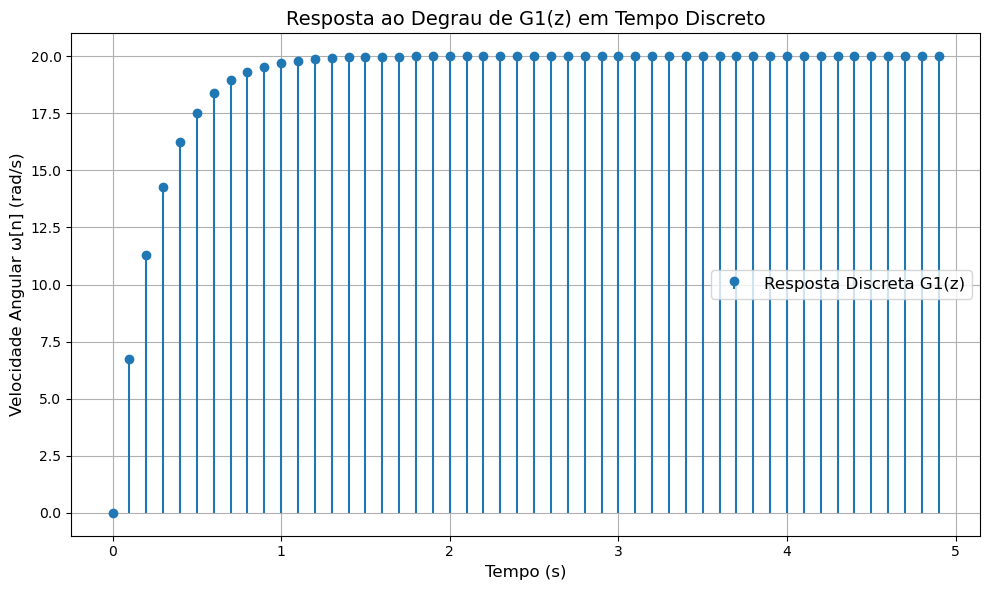

In [4]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Parâmetros do motor
Ra = 3            # Resistência da armadura (Ohm)
La = 6e-3         # Indutância da armadura (H)
K = 50e-3         # Constante do motor (Nm/A)
J = 2e-4          # Inércia (kg·m²)

# Tempo de amostragem
T = 0.001         # Tempo de amostragem (s), menor que a constante de tempo mais rápida (0,00202 s)

# Definição da função de transferência contínua G1(s)
numerator_G1 = [K]
denominator_G1 = [La * J, Ra * J, K**2]

# Criação da função de transferência contínua G1(s)
G1_continuo = control.TransferFunction(numerator_G1, denominator_G1)

# Discretização de G1(s) usando o método ZOH
G1_discreto = control.c2d(G1_continuo, T, method='zoh')

# Definição do vetor de tempo discreto
t_out = np.arange(0, 5, T)  # Vetor de tempo discreto de 0 a 5 segundos

# Simulação da resposta ao degrau para G1(z)
t_out, y_out = control.step_response(G1_discreto, T=t_out)

# Extração da resposta e conversão para um array unidimensional
y_out = np.squeeze(y_out)

# Redução da quantidade de pontos para uma plotagem mais clara
# Definindo o fator de amostragem para plotar apenas cada N-ésimo ponto
N = 100  # Ajuste este valor conforme necessário (por exemplo, 100 para plotar a cada 0.1s)

# Selecionar apenas cada N-ésimo ponto
t_plot = t_out[::N]
y_plot = y_out[::N]

# Plotar a resposta discreta de G1(z) usando stem com pontos mais espaçados
plt.figure(figsize=(10, 6))
plt.stem(t_plot, y_plot, basefmt=" ", markerfmt="C0o", linefmt='C0-', label='Resposta Discreta G1(z)')
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade Angular ω[n] (rad/s)', fontsize=12)
plt.title('Resposta ao Degrau de G1(z) em Tempo Discreto', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Definição da função de transferência contínua G1(s)
numerator_G1 = [K]
denominator_G1 = [La * J, Ra * J, K**2]

# Criação da função de transferência contínua G1(s)
G1_continuo = control.TransferFunction(numerator_G1, denominator_G1)

# Discretização de G1(s) usando o método ZOH
G1_discreto = control.c2d(G1_continuo, T, method='zoh')

# Definição da função de transferência contínua G2(s)
numerator_G2 = [-Ra, -La]
denominator_G2 = [La * J, Ra * J, K**2]

# Criação da função de transferência contínua G2(s)
G2_continuo = control.TransferFunction(numerator_G2, denominator_G2)

# Discretização de G2(s) usando o método ZOH
G2_discreto = control.c2d(G2_continuo, T, method='zoh')

# Exibir as funções de transferência discretizadas
print("G1(z):")
print(G1_discreto)
print("\nG2(z):")
print(G2_discreto)

G1(z):
<TransferFunction>: sys[3]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 0.01775 z + 0.01503
----------------------
z^2 - 1.605 z + 0.6065

dt = 0.001


G2(z):
<TransferFunction>: sys[5]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    -1967 z + 1967
----------------------
z^2 - 1.605 z + 0.6065

dt = 0.001



#### **c) Obtendo os polos de $G_1(z)$ e $G_2(z)$ após a disecretização.**

In [6]:
# Função para calcular os polos a partir do denominador
def calcular_polos(z_tf):
    # Extrair os coeficientes do denominador
    denominador = z_tf.den[0][0]
    # Calcular as raízes do denominador
    polos = np.roots(denominador)
    return polos

# Calcular os polos discretos obtidos pela discretização
polos_G1_discreto = calcular_polos(G1_discreto)
polos_G2_discreto = calcular_polos(G2_discreto)

print("\nPolos de G1(z):", polos_G1_discreto)
print("Polos de G2(z):", polos_G2_discreto)



Polos de G1(z): [0.99580684 0.60908465]
Polos de G2(z): [0.99580684 0.60908465]


#### Verificando a relação $z= e^{sT}$

In [7]:
polos_continuo_G1 = [-4.2, -496]  # em rad/s
polos_continuo_G2 = [-4.2, -496]  # supondo que G2(s) tenha os mesmos polos

# Calcular z = e^{sT} para cada polo contínuo
z_polos_continuo_G1 = [np.exp(pole * T) for pole in polos_continuo_G1]
z_polos_continuo_G2 = [np.exp(pole * T) for pole in polos_continuo_G2]

print("\nPolos discretos calculados por z = e^(sT) para G1(z):", z_polos_continuo_G1)
print("Polos discretos calculados por z = e^(sT) para G2(z):", z_polos_continuo_G2)

# Comparar com os polos discretos obtidos
print("\nComparação com polos discretos obtidos:")
for i, (z_calc, z_obt) in enumerate(zip(z_polos_continuo_G1, polos_G1_discreto)):
    print(f"G1(z) Polo {i+1}: Calculado = {z_calc:.6f}, Obtido = {z_obt:.6f}")

for i, (z_calc, z_obt) in enumerate(zip(z_polos_continuo_G2, polos_G2_discreto)):
    print(f"G2(z) Polo {i+1}: Calculado = {z_calc:.6f}, Obtido = {z_obt:.6f}")



Polos discretos calculados por z = e^(sT) para G1(z): [0.9958088076649545, 0.6089616410728969]
Polos discretos calculados por z = e^(sT) para G2(z): [0.9958088076649545, 0.6089616410728969]

Comparação com polos discretos obtidos:
G1(z) Polo 1: Calculado = 0.995809, Obtido = 0.995807
G1(z) Polo 2: Calculado = 0.608962, Obtido = 0.609085
G2(z) Polo 1: Calculado = 0.995809, Obtido = 0.995807
G2(z) Polo 2: Calculado = 0.608962, Obtido = 0.609085


#### **d) Ganho CC das FT em tempo discreto**

In [8]:
# Função para calcular o ganho CC em sistemas discretos
def ganho_CC(z_tf):
    # Soma dos coeficientes do numerador
    soma_num = np.sum(z_tf.num[0][0])
    # Soma dos coeficientes do denominador
    soma_den = np.sum(z_tf.den[0][0])
    # Ganho CC
    return soma_num / soma_den

# Calcular o ganho CC para G1(z) e G2(z)
G1_cc = ganho_CC(G1_discreto)
G2_cc = ganho_CC(G2_discreto)

print("\nGanho CC de G1(z):", G1_cc, "rad/s/V")
print("Ganho CC de G2(z):", G2_cc, "rad/s/Nm")



Ganho CC de G1(z): 19.99999999999939 rad/s/V
Ganho CC de G2(z): -2.3999999999938773 rad/s/Nm


## **Parte 2**

### 1) Gere e simule a resposta ao degrau unitário funções de transferência com as seguintes características.
#### a) Primeira ordem "rápida" 
Uma função de transferência de primeira ordem com tempo de constante pequeno apresenta uma resposta rápida ao degrau.

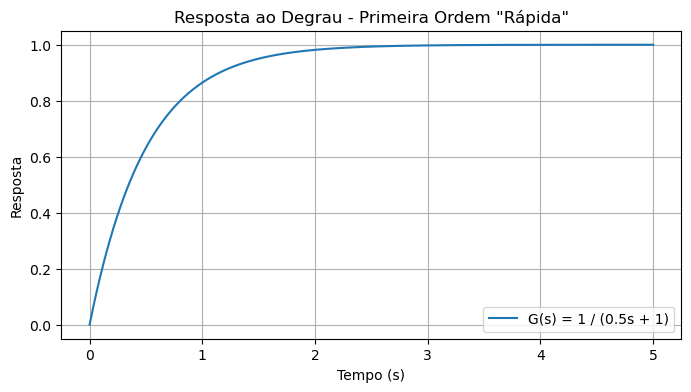

In [9]:
# Tempo de simulação
t = np.linspace(0, 5, 500)  # Simulação de 0 a 5 segundos com 500 pontos

# a) Primeira ordem "rápida"
K_a = 1
tau_a = 0.5  # Tempo de constante pequeno para resposta rápida

# Função de transferência
G_a = control.TransferFunction([K_a], [tau_a, 1])

# Simulação da resposta ao degrau
t_a, y_a = control.step_response(G_a, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_a, y_a, label='G(s) = 1 / (0.5s + 1)')
plt.title('Resposta ao Degrau - Primeira Ordem "Rápida"')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


### b) Primeira ordem "lenta". 

Uma função de transferência de primeira ordem com tempo de constante maior apresenta uma resposta mais lenta ao degrau. No gráfico é possível ver o comportamento mais gradual da resposta quando comparado ao item (a).

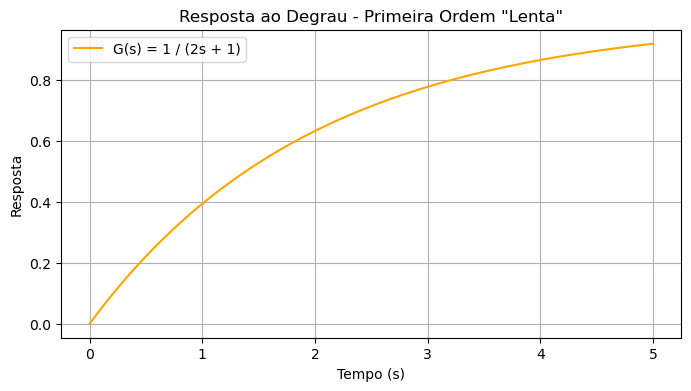

In [10]:
# b) Primeira ordem "lenta"
K_b = 1
tau_b = 2  # Tempo de constante maior para resposta lenta

# Função de transferência
G_b = control.TransferFunction([K_b], [tau_b, 1])

# Simulação da resposta ao degrau
t_b, y_b = control.step_response(G_b, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_b, y_b, label='G(s) = 1 / (2s + 1)', color='orange')
plt.title('Resposta ao Degrau - Primeira Ordem "Lenta"')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


### c) Primeira ordem "rápida" com ganho negativo

O ganho negativo dá a entender que a saída está invertida em relação à entrada. Quando um degrau positivo é aplicado na entrada, a saída responde com um degrau negativo.

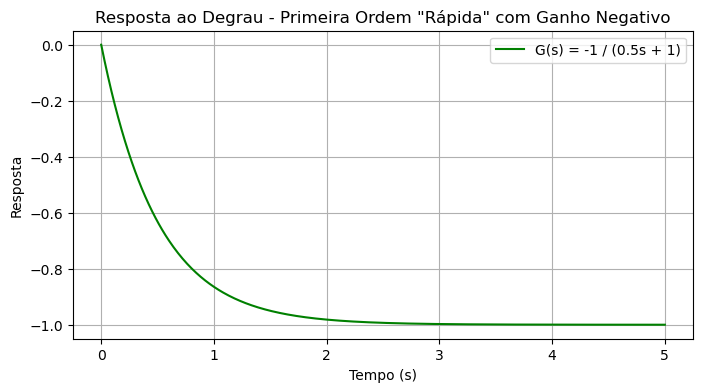

In [11]:
# c) Primeira ordem "rápida" com ganho negativo
K_c = -1  # Ganho negativo
tau_c = 0.5

# Função de transferência
G_c = control.TransferFunction([K_c], [tau_c, 1])

# Simulação da resposta ao degrau
t_c, y_c = control.step_response(G_c, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_c, y_c, label='G(s) = -1 / (0.5s + 1)', color='green')
plt.title('Resposta ao Degrau - Primeira Ordem "Rápida" com Ganho Negativo')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


### d) Segunda ordem sobreamortecida

O sistema retorna ao equilíbrio sem oscilações, mas com maior tempo de resposta comparado ao amortecimento crítico.

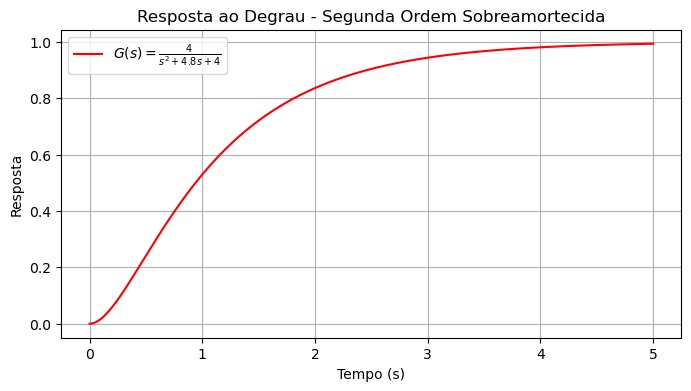

In [12]:
# d) Segunda ordem sobreamortecida
omega_n_d = 2  # Frequência natural
zeta_d = 1.2    # Amortecimento > 1

# Função de transferência
G_d = control.TransferFunction([omega_n_d**2], [1, 2*zeta_d*omega_n_d, omega_n_d**2])

# Simulação da resposta ao degrau
t_d, y_d = control.step_response(G_d, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_d, y_d, label=r'$G(s) = \frac{4}{s^2 + 4.8s + 4}$', color='red')
plt.title('Resposta ao Degrau - Segunda Ordem Sobreamortecida')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


### c) Segunda ordem subamortecida

O sistema oscila ao retornar ao equilíbrio. É possível observar a oscilação entre $2$ e $3$ segundos. 

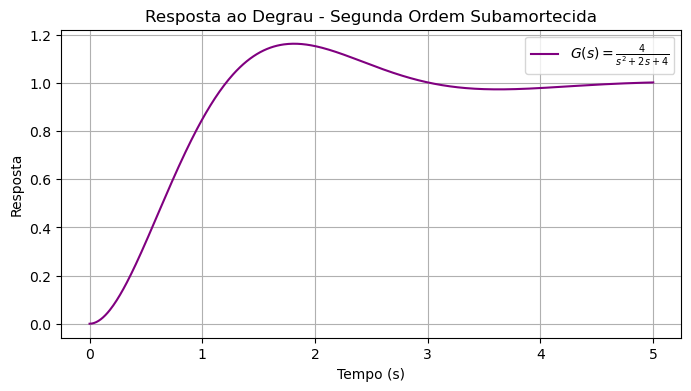

In [13]:
# e) Segunda ordem subamortecida
omega_n_e = 2  # Frequência natural
zeta_e = 0.5    # Amortecimento < 1

# Função de transferência
G_e = control.TransferFunction([omega_n_e**2], [1, 2*zeta_e*omega_n_e, omega_n_e**2])

# Simulação da resposta ao degrau
t_e, y_e = control.step_response(G_e, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_e, y_e, label=r'$G(s) = \frac{4}{s^2 + 2s + 4}$', color='purple')
plt.title('Resposta ao Degrau - Segunda Ordem Subamortecida')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


### f) Segunda ordem com amortecimento crítico.

O sistema retorna ao equilíbrio o mais rápido possível sem oscilações. É possível ver que o sistema alcança o equilíbrio bem mais rápido que a resposta de segunda ordem sobreamortecida. 

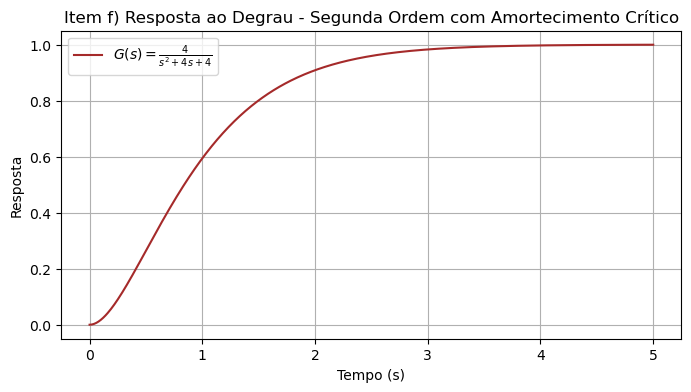

In [14]:
# f) Segunda ordem com amortecimento crítico
omega_n_f = 2  # Frequência natural
zeta_f = 1      # Amortecimento = 1

# Função de transferência
G_f = control.TransferFunction([omega_n_f**2], [1, 2*zeta_f*omega_n_f, omega_n_f**2])

# Simulação da resposta ao degrau
t_f, y_f = control.step_response(G_f, T=t)

plt.figure(figsize=(8, 4))
plt.plot(t_f, y_f, label=r'$G(s) = \frac{4}{s^2 + 4s + 4}$', color='brown')
plt.title('Item f) Resposta ao Degrau - Segunda Ordem com Amortecimento Crítico')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()


## 2. Item 2


#### **a) Constante de Tempo para Sistemas de Primeira Ordem**

Pode ser obtida com a função de transferência. 

##### **Equação da FT**

$G(s) = \frac{K}{\tau s + 1}$

Onde:
- $ K $ é o ganho estático do sistema.
- $ \tau $ é a constante de tempo.

#### **b) Ganho em Regime Permanente (Ganho CC)**


##### **Equação para Sistemas de Primeira e Segunda Ordem**

Para uma função de transferência tal como:

$G(s) = \frac{N(s)}{D(s)}$

O Ganho CC é calculado como:

$G_{CC} = \frac{\sum \text{coeficientes do numerador}}{\sum \text{coeficientes do denominador}}$

##### **Cálculo do Ganho CC**

$G_{CC} = \frac{b_0 + b_1 + \dots + b_n}{1 + a_1 + \dots + a_n}$

Onde:
- $ b_i $ são os coeficientes do numerador $ N(s) $.
- $ a_i $ são os coeficientes do denominador $ D(s) $, assumindo 1 como termo constante.


#### **c) Coeficiente de Amortecimento e Frequência Natural para Sistemas de Segunda Ordem**

###### **Equação da Função de Transferência**

$G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$

Onde:
- $ \omega_n $ é a frequência natural do sistema.
- $ \zeta $ é o coeficiente de amortecimento.

###### **Cálculo de $ \zeta $ e $ \omega_n $**

A partir dos coeficientes do denominador $ s^2 + a_1 s + a_0 $:

$\omega_n = \sqrt{a_0}$

$\zeta = \frac{a_1}{2\omega_n}$

Os valores obtidos para todos os itens (a), (b) e (c) da questão 2 podem ser conferidos no *output* do código abaixo. 

In [15]:
# Dicionário de funções para facilitar a iteração
funcoes_primeira_ordem = {
    'a) Primeira Ordem "Rápida"': G_a,
    'b) Primeira Ordem "Lenta"': G_b,
    'c) Primeira Ordem "Rápida" com Ganho Negativo': G_c
}

funcoes_segunda_ordem = {
    'd) Segunda Ordem Sobreamortecida': G_d,
    'e) Segunda Ordem Subamortecida': G_e,
    'f) Segunda Ordem com Amortecimento Crítico': G_f
}

# Função para calcular o Ganho CC
def calcular_ganho_cc(z_tf):
    # Soma dos coeficientes do numerador
    soma_num = np.sum(z_tf.num[0][0])
    # Soma dos coeficientes do denominador
    soma_den = np.sum(z_tf.den[0][0])
    # Ganho CC
    return soma_num / soma_den

# Função para extrair parâmetros de sistemas de primeira ordem
def parametros_primeira_ordem(z_tf):
    # A função de transferência é G(s) = K / (tau * s + 1)
    # Então, tau é o coeficiente do denominador de s
    tau = z_tf.den[0][0][0]
    return tau

# Função para extrair parâmetros de sistemas de segunda ordem
def parametros_segunda_ordem(z_tf):
    # A função de transferência é G(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
    # Coeficientes do denominador
    a1 = z_tf.den[0][0][1]
    a0 = z_tf.den[0][0][2]
    omega_n = np.sqrt(a0)
    zeta = a1 / (2 * omega_n)
    return zeta, omega_n

# Cálculo dos parâmetros para sistemas de primeira ordem
print("### a) Primeira Ordem 'Rápida'")
tau_a_calculado = parametros_primeira_ordem(G_a)
ganho_cc_a = calcular_ganho_cc(G_a)
print(f"Constante de Tempo (tau): {tau_a_calculado} s")
print(f"Ganho CC: {ganho_cc_a}\n")

print("### b) Primeira Ordem 'Lenta'")
tau_b_calculado = parametros_primeira_ordem(G_b)
ganho_cc_b = calcular_ganho_cc(G_b)
print(f"Constante de Tempo (tau): {tau_b_calculado} s")
print(f"Ganho CC: {ganho_cc_b}\n")

print("### c) Primeira Ordem 'Rápida' com Ganho Negativo")
tau_c_calculado = parametros_primeira_ordem(G_c)
ganho_cc_c = calcular_ganho_cc(G_c)
print(f"Constante de Tempo (tau): {tau_c_calculado} s")
print(f"Ganho CC: {ganho_cc_c}\n")

# Cálculo dos parâmetros para sistemas de segunda ordem
print("### d) Segunda Ordem Sobreamortecida")
zeta_d_calculado, omega_n_d_calculado = parametros_segunda_ordem(G_d)
ganho_cc_d = calcular_ganho_cc(G_d)
print(f"Coeficiente de Amortecimento (zeta): {zeta_d_calculado}")
print(f"Frequência Natural (omega_n): {omega_n_d_calculado} rad/s")
print(f"Ganho CC: {ganho_cc_d}\n")

print("### e) Segunda Ordem Subamortecida")
zeta_e_calculado, omega_n_e_calculado = parametros_segunda_ordem(G_e)
ganho_cc_e = calcular_ganho_cc(G_e)
print(f"Coeficiente de Amortecimento (zeta): {zeta_e_calculado}")
print(f"Frequência Natural (omega_n): {omega_n_e_calculado} rad/s")
print(f"Ganho CC: {ganho_cc_e}\n")

print("### f) Segunda Ordem com Amortecimento Crítico")
zeta_f_calculado, omega_n_f_calculado = parametros_segunda_ordem(G_f)
ganho_cc_f = calcular_ganho_cc(G_f)
print(f"Coeficiente de Amortecimento (zeta): {zeta_f_calculado}")
print(f"Frequência Natural (omega_n): {omega_n_f_calculado} rad/s")
print(f"Ganho CC: {ganho_cc_f}\n")


### a) Primeira Ordem 'Rápida'
Constante de Tempo (tau): 0.5 s
Ganho CC: 0.6666666666666666

### b) Primeira Ordem 'Lenta'
Constante de Tempo (tau): 2 s
Ganho CC: 0.3333333333333333

### c) Primeira Ordem 'Rápida' com Ganho Negativo
Constante de Tempo (tau): 0.5 s
Ganho CC: -0.6666666666666666

### d) Segunda Ordem Sobreamortecida
Coeficiente de Amortecimento (zeta): 1.2
Frequência Natural (omega_n): 2.0 rad/s
Ganho CC: 0.4081632653061224

### e) Segunda Ordem Subamortecida
Coeficiente de Amortecimento (zeta): 0.5
Frequência Natural (omega_n): 2.0 rad/s
Ganho CC: 0.5714285714285714

### f) Segunda Ordem com Amortecimento Crítico
Coeficiente de Amortecimento (zeta): 1.0
Frequência Natural (omega_n): 2.0 rad/s
Ganho CC: 0.4444444444444444

